# 『なにわ十六橋智恵の渡り』には「オイラー閉路」が存在する。('24.06.06)

## 「保古帖」（甲雑-58）巻19収録の「なにわ十六橋智恵の渡り」

昨日は、[『なには八ツ橋智恵の渡り』](https://hirax.github.io/wow/html/day_240605_graph_naniwa.html)を、単純な「ケーニヒスベルグの橋の問題」として解いてみた。
つまり、「すべての橋を1度だけ渡り、同じ場所に戻ってくることができるか」という、ケーニヒスベルグの橋の問題として解いてみた。

「保古帖」（甲雑-58）巻19には、「なにわ十六橋智恵の渡り」という、同様の問題が収録されている。
そこで、今日は、「なにわ十六橋智恵の渡り」を、やはり単純な※ケーニヒスベルグの橋の問題として解いてみようと思う。

※「単純な」という言葉の意味については、後述しようと思う。

%<img style="float:center;transform: rotate(0deg); height:12cm" src="./images/day_240606_graphx_naniwa_16.jpeg" />
```{figure} ./images/day_240606_graphx_naniwa_16.jpeg
---
height: 12cm
---
「なにわ十六橋智恵の渡り」
```

## 「なにわ十六橋智恵の渡り」は一筆書き可能

「なにわ十六橋智恵の渡り」は、少し見づらいのだけれど、題目通りに16の橋がある。
一見すると、14橋しかないように見えるが、島内部にある橋がひとつ、折り目に重なる橋がひとつあり、合計で16の橋がある。
そして、橋で繋がれた島は、合計7つある。
島内部にある橋は、「ケーニヒスベルグの橋の問題」としては存在を無視して良い。
したがって、「なにわ十六橋智恵の渡り」はこういう問題だ。
「7つの頂点間を結ぶ15の辺を、ちょうど1度だけ通るオイラー閉路が存在するか？」

まずは、「なにわ十六橋智恵の渡り」を表現する、グラフ構造を作ってみよう。

島の数 7
橋の数 15


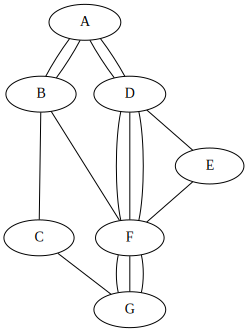

In [16]:
import numpy as np
import networkx as nx

# c.f. https://medium.com/@victorialandaberry/solving-the-konigsberg-bridge-problem-with-python-914f9f51bb8e
g = nx.MultiGraph() #create an empto Multigraph named G
#add nodes one by one 
g.add_node("難波A")
g.add_node("難波B")
g.add_node("難波C")
g.add_node("難波D")
g.add_node("難波E")
g.add_node("難波F")
g.add_node("難波G")
#add edges
g.add_edge("難波A", "難波B")
g.add_edge("難波A", "難波B")
g.add_edge("難波A", "難波D")
g.add_edge("難波A", "難波D")
g.add_edge("難波B", "難波C")
g.add_edge("難波B", "難波F")
g.add_edge("難波C", "難波G")
g.add_edge("難波D", "難波E")
g.add_edge("難波D", "難波F")
g.add_edge("難波D", "難波F")
g.add_edge("難波D", "難波F")
g.add_edge("難波E", "難波F")
g.add_edge("難波F", "難波G")
g.add_edge("難波F", "難波G")
g.add_edge("難波F", "難波G")

print("島の数",  g.number_of_nodes())
print("橋の数", g.number_of_edges())

from IPython.display import display,SVG

def draw(graph):
    svg = nx.nx_agraph.to_agraph(graph).draw(prog='dot',format='svg')
    display(SVG(svg))

draw(g)

そして、オイラー閉路が存在するかどうかを判定する、昨日書いたコードを実行してみる。
すると、「一筆書き経路で元の場所に戻ることができます」という結果が得られる。
つまり、すべての島＝頂点に繋がる橋＝辺は偶数なので、「なにわ十六橋智恵の渡り」には「オイラー閉路が存在する」というのが答えだ。

In [17]:
def eulerpath(graph):
    odd=0
    a=list(graph.degree(graph.nodes()))
    for i in a:
        if (i[1] % 2) != 0:
            odd+=1
    if odd>0:
        print("一筆書き経路で元の場所に戻ることはできません。")
    else:
        print("一筆書き経路で元の場所に戻ることができます。")

eulerpath(g)

一筆書き経路で元の場所に戻ることができます。


## 一筆書き経路（オイラー閉路）を計算してみる。

一筆書き経路（オイラー閉路）が存在するとわかれば、その経路を計算するのは簡単だ。
島や橋の数が多ければ計算時間は掛かるけれど、今回の「なにわ十六橋智恵の渡り」くらいの計算量であれば、一瞬で経路例を作り出すことができる。

In [15]:
for (u,v) in list(nx.eulerian_circuit(g)):
    print(u,'から',v,'に渡る。')

難波A から 難波D に渡る。
難波D から 難波F に渡る。
難波F から 難波G に渡る。
難波G から 難波F に渡る。
難波F から 難波D に渡る。
難波D から 難波F に渡る。
難波F から 難波G に渡る。
難波G から 難波C に渡る。
難波C から 難波B に渡る。
難波B から 難波F に渡る。
難波F から 難波E に渡る。
難波E から 難波D に渡る。
難波D から 難波A に渡る。
難波A から 難波B に渡る。
難波B から 難波A に渡る。


## 「なにわ十六橋智恵の渡り」の舞台「中之島」あたりを眺めてみる

「ケーニヒスベルグの橋の問題」が、現実の町に存在する島や橋を題材にしたように、大阪を舞台とした「ケーニヒスベルグの橋の問題」も、実際の町を踏まえた観光計算問題だ。
ちなみに、「なにわ十六橋智恵の渡り」の舞台は中之島あたりである。
東西南北の方向は異なるが、現在の地図を貼り付けてみると、下のような具合だ。

%<img style="float:center;transform: rotate(0deg); height:9cm" src="./images/day_240606_graphx_naniwa_.png" />
```{figure} ./images/day_240606_graphx_naniwa_.png
---
height: 9cm
---
「なにわ十六橋智恵の渡り」の舞台となった場所（現在）
```


## 和算の「橋渡り問題」はまだ続く

『浪華二十八橋智慧渡』や『なには八ツ橋智恵の渡り』あるいは『なにわ十六橋智恵の渡り』といった具合で、和算書物などに登場する「大阪、水の都での橋渡り問題」は多い。
古地図と和算の出題図を眺めながら、大阪の町を歩いてみるのも面白いかもしれない。